<h2 style="font-family:verdana;text-align:center"> IPL Dataset Analysis</h2>
<hr>
<p style="font-family:verdana;font-size:18px;"> 
    Hey there!! I love cricket and wanted to provide my insights on this dataset. This will be an EDA notebook as I've been meaning to experiment with Plotly.<br>
    Before proceeding further, let me walk you through my approach. There are two angles that I'm considering to bring about my analysis.<br>
    <b> 1. Identify trends pertaining to each team.</b> Eg: Team Combinations, Performance in the powerplay, etc<br>
    <b> 2. Identify trends that occurred during the tournament</b> Eg: Decision of winning the toss, Average first innings scores, etc<br><br> 
    I hope to uncover something cool. Let's go!!
</p>
    
   
        

<h3> Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
init_notebook_mode(connected=True)
cf.go_offline(True)

In [3]:
df_season_details_2022 = pd.read_csv("../input/indian-premier-league-ipl-all-seasons/2022/season_details.csv")
df_season_summary_2022 = pd.read_csv("../input/indian-premier-league-ipl-all-seasons/2022/season_summary.csv")

In [4]:
df_season_summary_2022.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,"Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,...,"Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,...,"Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,...,"Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,...,"Kane Williamson (UKN),Abhishek Sharma (AR),Rah...","Jos Buttler (UKN),Yashasvi Jaiswal (UKN),Sanju...","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",29 March 2022 - night match (20-over match),Ulhas Gandhe,Bruce Oxenford,KN Ananthapadmanabhan,Shakti Singh,Saidharshan Kumar


In [5]:
df_season_summary_2022.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [6]:
df_season_summary_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            74 non-null     int64  
 1   id                74 non-null     int64  
 2   name              74 non-null     object 
 3   short_name        74 non-null     object 
 4   description       74 non-null     object 
 5   home_team         74 non-null     object 
 6   away_team         74 non-null     object 
 7   toss_won          74 non-null     object 
 8   decision          74 non-null     object 
 9   1st_inning_score  74 non-null     object 
 10  2nd_inning_score  74 non-null     object 
 11  home_score        74 non-null     object 
 12  away_score        74 non-null     object 
 13  winner            74 non-null     object 
 14  result            74 non-null     object 
 15  start_date        74 non-null     object 
 16  end_date          74 non-null     object 
 17 

In [7]:
df_teams_winning_chasing = df_season_summary_2022[(df_season_summary_2022.decision=="BOWL FIRST") & (df_season_summary_2022.toss_won == df_season_summary_2022.winner)]

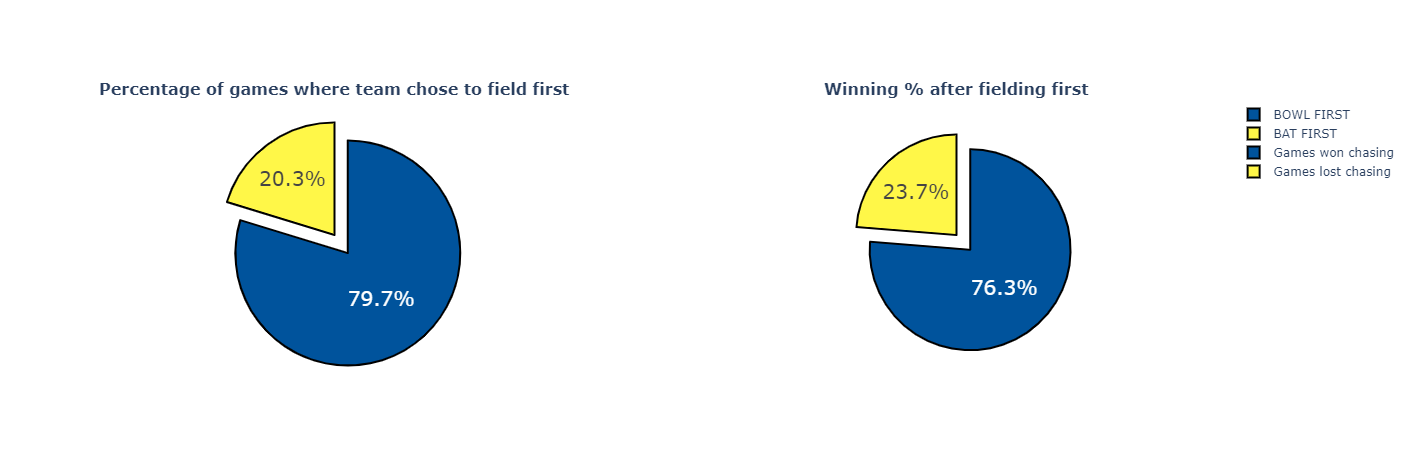

In [8]:
toss_decision_labels = list(df_season_summary_2022.decision.value_counts().index)
toss_decision_values = df_season_summary_2022.decision.value_counts()

teams_winning_chasing_labels = ["Games won chasing","Games lost chasing"]
teams_winning_chasing_values = [np.shape(df_teams_winning_chasing)[1],(df_season_summary_2022.decision == "BOWL FIRST").sum() - np.shape(df_teams_winning_chasing)[1]]

colors = ["#00539CFF","#FFF748"]

#fig = go.Figure(data=[go.Pie(labels=teams_winning_chasing_labels,values=teams_winning_chasing_values,pull=[0.2,0])])

fig = make_subplots(rows=1,cols=2,specs=[[{"type":"pie"},{"type":"pie"}]],subplot_titles=['<b>Percentage of games where team chose to field first</b>','<b>Winning % after fielding first</b>'])
fig.add_trace(go.Pie(labels=toss_decision_labels,values=toss_decision_values,pull=[0.2,0],scalegroup="one"),row=1,col=1)
fig.add_trace(go.Pie(labels=teams_winning_chasing_labels,values=teams_winning_chasing_values,pull=[0.2,0],scalegroup="one"),row=1,col=2)
fig.update_traces(hoverinfo='label+value',textfont_size=20,marker=dict(colors=colors,line=dict(color='#000000', width=2)))
fig.show()

<div style="background-color:#FFF748;font-family:verdana;"> 
    <p style="color:#000000"> 📌 Inference 1: In 80% of the games, the team which has won the toss has decided to field first. Furthermore, those teams have a staggering win-rate of 76.3% thereby highlighting how important the toss has been.</div>

In [ ]:
df_season_summary_2022.venue_name.value_counts()